In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.warnings.filterwarnings('ignore')

## Reading and Investing my data set

In [89]:
bank = pd.read_csv('bank-additional-full.csv', sep=";")

Abstract This is dataset that describe Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank's clients to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits

 ####  Aim of the project: 
 #### Consider the marketing effectiveness prediction. I want to evaluate the responses of the bank's client to the marketing campaign, whether a client will make a deposit or not.

In [90]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Attribute Information on Bank Dataset:

1. Age
2. Job - type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital - marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. Education - Shows the level of education of each customer (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. Default - Whether a customer has credit in default (categorical: 'no','yes','unknown')
6. Housing - Does the customer have a housing loan? (categorical: 'no','yes','unknown')
7. Loan - Does the customer have a personal loan? (categorical: 'no','yes','unknown')
8. Contact - The contact communication type (categorical: 'cellular','telephone')
9. Month - Last contact month of year
10. day_of_week - Last contact day of Week
11. Duration - Last contact duration in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
12. Campaign - Number of contact performed for the client during the campaign
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate - quarterly indicator
17. cons.price.idx: consumer price index - monthly indicator
18. cons.conf.idx: consumer confidence index - monthly indicator
19. euribor3m: euribor 3 month rate - daily indicator
20. nr.employed: number of employees - quarterly indicator
21. y - has the client subscribed a term deposit? (binary: 'yes','no')





 Inspecting the data

In [91]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [92]:
bank.shape

(41188, 21)

In [93]:
# Inspecting the class of y column y - has the client subscribed a term deposit? (binary: 'yes', 'no')
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

 ### Subset of the target market

In [94]:
Bank_clients = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

In [95]:
Bank_clients

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


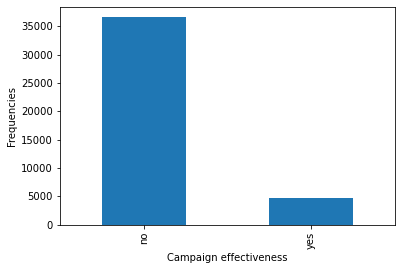

In [96]:
# plot of ratings and their frequencies in the data
Bank_clients['y'].value_counts().plot(kind='bar')
plt.xlabel('Campaign effectiveness')
plt.ylabel('Frequencies')
plt.show()

In [97]:
Bank_clients['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [98]:
# Curious to know the clients with the types of jobs that either has a 'Yes' or 'No'

bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [99]:
Bank_clients[['job', 'y']]

,job,y
0,housemaid,no
1,services,no
2,services,no
3,admin.,no
4,services,no
...,...,...
41183,retired,yes
41184,blue-collar,no
41185,retired,no
41186,technician,yes


In [100]:
Bank_clients[['marital', 'y']].value_counts().reset_index

<bound method Series.reset_index of marital   y  
married   no     22396
single    no      9948
divorced  no      4136
married   yes     2532
single    yes     1620
divorced  yes      476
unknown   no        68
          yes       12
dtype: int64>

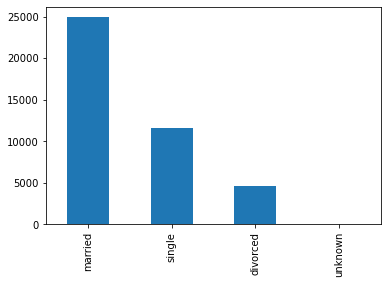

In [101]:
# Classes of the clients
Bank_clients['marital'].value_counts().plot(kind='bar')
#plt.xlabel('Campaign effectiveness')
#plt.ylabel('Frequencies')
plt.show()

In [102]:
# Build a function to show categorical values distribution of the marketing campaign 
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = bank[bank['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = bank[bank['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

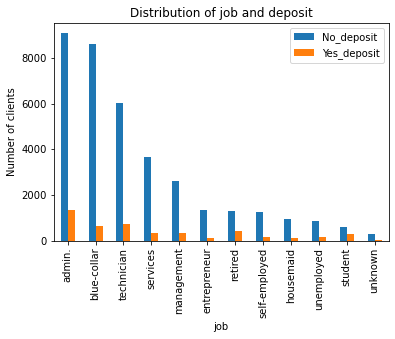

In [103]:
plot_bar('job')

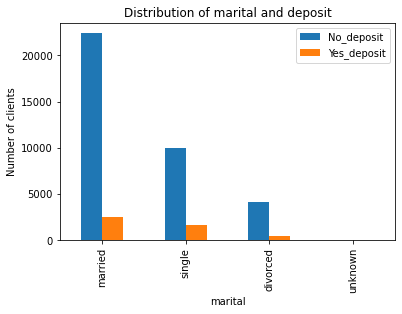

In [104]:
plot_bar('marital')

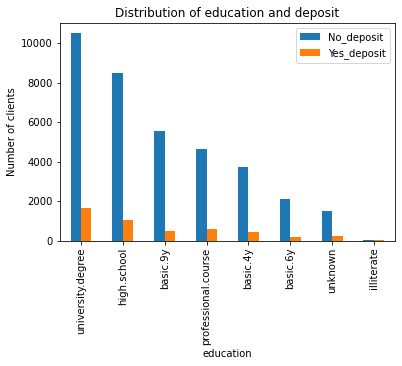

In [105]:
plot_bar('education')

In [106]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [107]:
bank[['contact', 'y']]

,contact,y
0,telephone,no
1,telephone,no
2,telephone,no
3,telephone,no
4,telephone,no
...,...,...
41183,cellular,yes
41184,cellular,no
41185,cellular,no
41186,cellular,yes


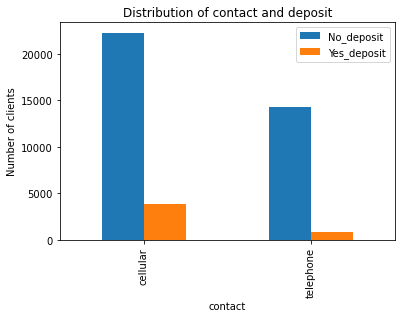

In [108]:
plot_bar('contact')

Best communicative channel was cellular.
Customers can only use landline phones in a single location where there is a wired connection to the telephone network. But Cell phones are operational anywhere the user can get a signal from a wireless network, I believe that is why we have more positive response from clients using cellular. 

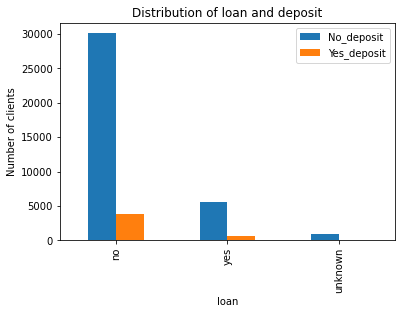

In [109]:
plot_bar('loan')

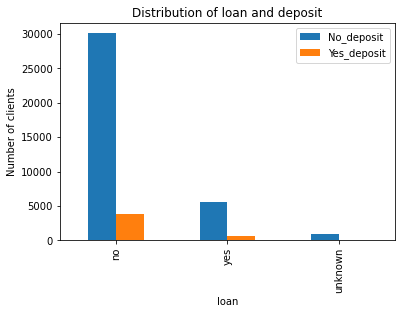

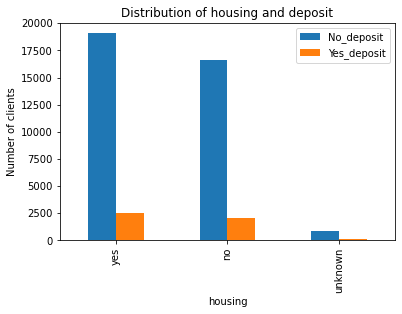

(None, None)

In [110]:
 plot_bar('loan'), plot_bar('housing')

The campaign seeks to gain customers for a deposit in the bank. Then, people who have a loan are less likely to enter into a deposit. This is probably the reason why people who don't have loans are way more targetted than people who do have a loan.

Impact of the marketing campaign

In [111]:
bank['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [114]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

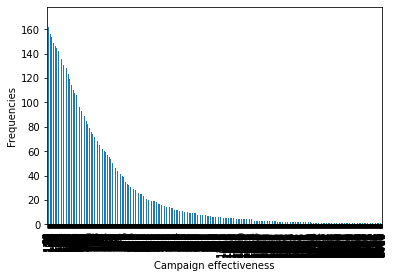

In [113]:
bank['duration'].value_counts().plot(kind='bar')
plt.xlabel('Campaign effectiveness')
plt.ylabel('Frequencies')
plt.show()

In [115]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

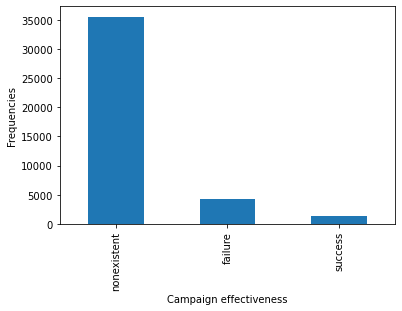

In [116]:
bank['poutcome'].value_counts().plot(kind='bar')
plt.xlabel('Campaign effectiveness')
plt.ylabel('Frequencies')
plt.show()

Outcome of the previous marketing campaign ('failure','nonexistent','success')

In [117]:
bank['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

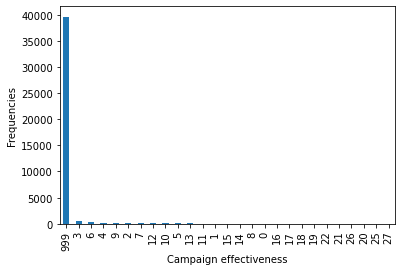

In [118]:
bank['pdays'].value_counts().plot(kind='bar')
plt.xlabel('Campaign effectiveness')
plt.ylabel('Frequencies')
plt.show()

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

I believe this is one of the reasons why the marketing campaign was not successful, because the clients were not contacted as a means of follow up.

## Inspecting for the collinearity of other features to the target variable 'y'

In [25]:
# Convert target variable into numeric
bank.y = bank.y.map({'no':0, 'yes':1}).astype('uint8')

In [26]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [27]:
# Build correlation matrix
bank_corr = bank.corr()
bank_corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


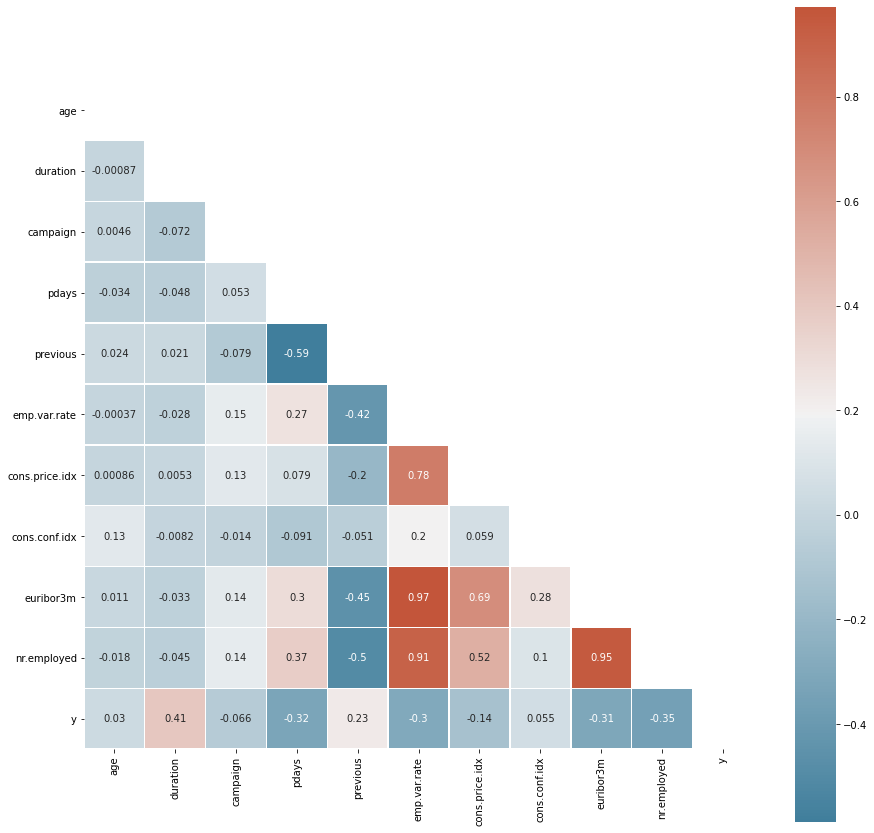

In [28]:
# Build correlation matrix using heatmap
import seaborn as sns

corr = bank.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True)
plt.show()

In [29]:
# euribor3m: euribor 3 month rate - daily indicator
# nr.employed: number of employees - quarterly indicator

From correlation matrix we observe next:

The most correlated with target feature is call duration. Also, we have higly correlated features of uribor3m, nr.employed, and 	emp.var.rate. These columns does the same thing in correlation and we have to remove one or two of them to prevent it affecting our prediction

## Remove Column Collinearity



In [30]:
# euribor3m - this column means euribor 3 month rate - daily indicator
# nr.employed - number of employees - quarterly indicator Output variable (desired target):

Bank_drop = bank.drop(['euribor3m', 'emp.var.rate'], axis=1)

In [31]:
Bank_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,5191.0,0


#### Print heatmap again after removing 'euribor3m' and 'emp.var.rate' from the dataset

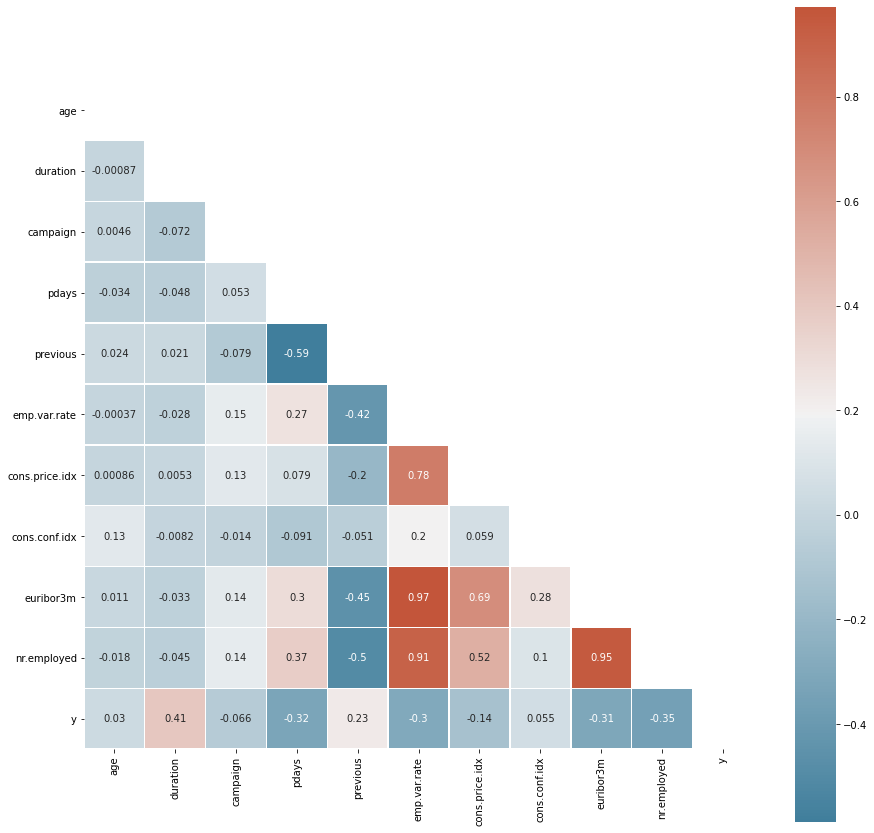

In [32]:
# Print heatmap again

bank_df = Bank_drop.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True)
plt.show()

Let's look at our data using visualization to see how it affects our output target
#### if duration=0 then y='no'

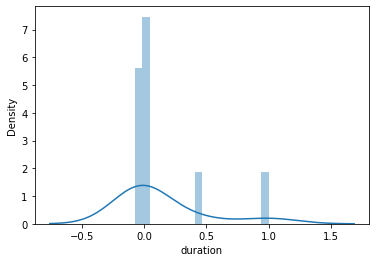

In [33]:
sns.distplot(bank_df['duration'])
plt.show()

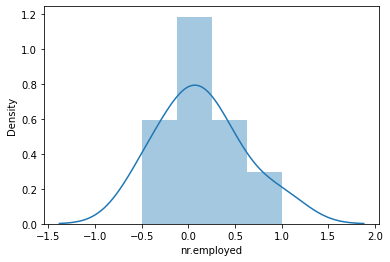

In [34]:
sns.distplot(bank_df['nr.employed'])
plt.show()

### Preprocessing the numerical variables

In [35]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [36]:
# From my data description, the mean and max has large numbers far apart,
# Variables that are measured at different scales do not contribute equally to the 
# model fitting & model learned function and might end up creating a bias. For better performance, we need to normalise the data

In [37]:
from sklearn.preprocessing import StandardScaler


data_num = bank.select_dtypes(include = np.number).drop(columns = 'y')
print(data_num.head())

# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
Bank_drop = pd.DataFrame(data_num_standardized, columns = data_num.columns)
print(Bank_drop.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
3 -

In [38]:
import seaborn as sns

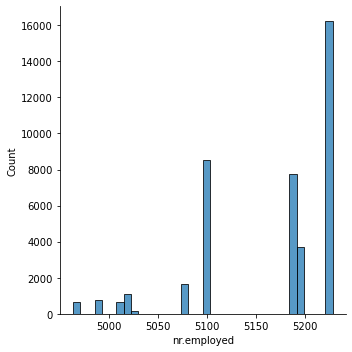

In [39]:
# Before Standardizing my data

sns.displot(bank['nr.employed'])

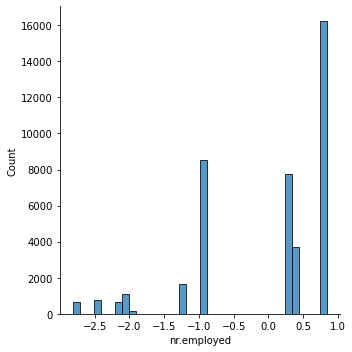

In [40]:
# After Standardizing my data

sns.displot(Bank_drop['nr.employed'])

### Getting dummies for the categorical variables

In [41]:
# Converting categorical variables to numerical using one hot encoder. It also transforms the data
from sklearn.preprocessing import OneHotEncoder

cat = Bank_drop.select_dtypes(include = np.object)
enc = OneHotEncoder()
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

""
0
1
2
3
4


In [42]:
#categorical.dtypes

In [43]:
categorical.shape

(41188, 0)

In [44]:
categorical.sum(axis = 1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41183    0.0
41184    0.0
41185    0.0
41186    0.0
41187    0.0
Length: 41188, dtype: float64

In [45]:
num_df = Bank_drop.select_dtypes( exclude = np.object)

In [46]:
num_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [47]:
y = bank['y']
X = pd.concat((num_df, categorical), axis=1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [48]:
bank['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Label 0 is the class of clients that did not deposit, that is no

Label 1 is the class of clients that deposited after the marketing campaign, that is yes

#### Splitting into train and test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [50]:
y_train

15994    1
10644    0
13412    0
25148    0
30790    0
        ..
16304    0
79       0
12119    0
14147    0
38408    0
Name: y, Length: 32950, dtype: uint8

### Using LogisticRegression model to generate predictions of the effective marketing campaign both on the training and the testing set

In [51]:
from sklearn.linear_model import LogisticRegression


Bank_log = LogisticRegression().fit(X_train, y_train)

In [52]:
Bank_log.score(X_test, y_test)


0.9109007040543822

In [53]:
train_predictions = Bank_log.predict(X_train)
test_predictions = Bank_log.predict(X_test)

#### Calculating and printing the accuracy score for both the training and the testing set of the bank marketing campaign.

In [54]:
from sklearn.metrics import accuracy_score

print("Training of the bank marketing campaign:", accuracy_score(y_train, train_predictions))
print("Testing of the bank marketing campaign:", accuracy_score(y_test, test_predictions))

Training of the bank marketing campaign: 0.9088619119878604
Testing of the bank marketing campaign: 0.9109007040543822


#### Calculating and printing the balanced accuracy score for both the training and the testing set of the bank marketing campaign dataset.

In [55]:
from sklearn.metrics import balanced_accuracy_score

print("Training:", balanced_accuracy_score(y_train, train_predictions))
print("Testing:", balanced_accuracy_score(y_test, test_predictions))

Training: 0.684434743418554
Testing: 0.6790326269852593


#### Calculating and printing the precision, recall  and F1 score for both the training and the testing set

In [56]:
from sklearn.metrics import precision_score

print("Training:", precision_score(y_train, train_predictions, pos_label=1))
print("Testing:", precision_score(y_test, test_predictions, pos_label=1))

Training: 0.6659132007233273
Testing: 0.6621880998080614


In [57]:
from sklearn.metrics import recall_score

print("Training:", recall_score(y_train, train_predictions, pos_label=1))
print("Testing:", recall_score(y_test, test_predictions, pos_label=1))

Training: 0.39416644367139414
Testing: 0.38205980066445183


#### Calculating and printing the F1 score for both the training and the testing set.

In [58]:
from sklearn.metrics import f1_score

print("Training:", f1_score(y_train, train_predictions, pos_label=1))
print("Testing:", f1_score(y_test, test_predictions, pos_label=1))

Training: 0.49520927887039834
Testing: 0.4845505617977528


In [59]:
bank.shape

(41188, 21)

#### Confusion matrices for both the training and the testing set.

In [60]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, test_predictions)
print(conf_matrix)

[[7159  176]
 [ 558  345]]


From the confusion matrixs above, Class O label(No-class)- 7159 clients that are in class 0, who did not make deposit after the marketing campaign  and 176 clients that are predicted to be in 1 are in class 0.

Class 1(Yes-class): Those that successfully made deposit to the bank after the marketing campaign.
345 clients successful made deposit, but 558 of clients that did not make deposit were wrongly classified in class 1 

<AxesSubplot:>

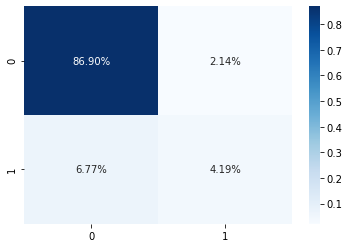

In [61]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [62]:
# True negative of 86.90% are identified as the clients that falls under class 0, people that did not make bank deposit after the campaign
# True positive of 4.19% are correctly identified as the clients that are under class 1, the people that made deposit after the marketing campaign

### Using Decision Tree to generate predictions of the effective marketing campaign both on the training and the testing set

In [63]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [64]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.8953629521728574

In [65]:
cf_matrix_tree = confusion_matrix(y_test, predictions)
print(cf_matrix_tree)

[[6884  451]
 [ 411  492]]


<AxesSubplot:>

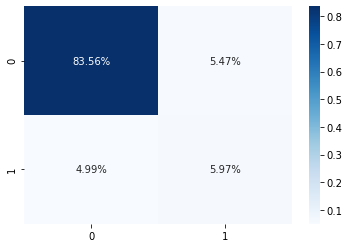

In [66]:
sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True, 
            fmt='.2%', cmap='Blues')

In [67]:
from sklearn.metrics import precision_score

print(precision_score(y_test, predictions, pos_label=1))
print(recall_score(y_test, predictions, pos_label=1))
print(f1_score(y_test, predictions, pos_label=1))

0.5217391304347826
0.5448504983388704
0.533044420368364


printing the balance accuracy test for decision tree

In [68]:
balanced_accuracy_score(y_test, predictions)

0.7416822362178332

In [69]:
decisiontree.feature_importances_

array([0.14945592, 0.4181973 , 0.05061675, 0.02948079, 0.01532984,
       0.00371431, 0.01508792, 0.02872077, 0.12864407, 0.16075232])

In [70]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

{'age': 0.14945592081363424, 'duration': 0.4181973033096539, 'campaign': 0.05061674865214236, 'pdays': 0.029480789715889844, 'previous': 0.01532983738769318, 'emp.var.rate': 0.0037143117904695896, 'cons.price.idx': 0.015087924535967606, 'cons.conf.idx': 0.028720772862766735, 'euribor3m': 0.12864407144674578, 'nr.employed': 0.1607523194850367}


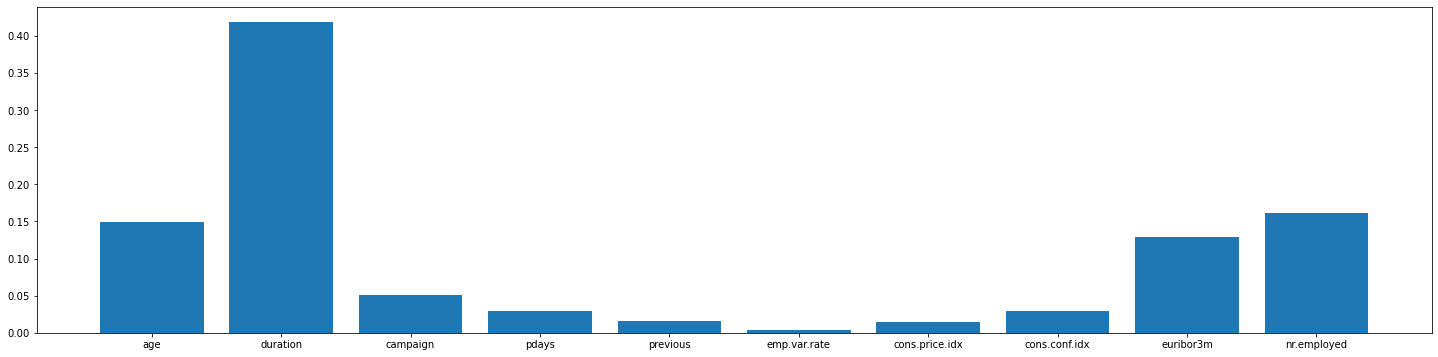

In [73]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

SVM

In [120]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
predictions = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.911750424860403
0    7712
1     526
dtype: int64


### K-Nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictions = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.9041029376062151
0    7465
1     773
dtype: int64


The best classification model that gave me better performance in my predictions accuracy score is ...